
##  Have you thought about which dogs are more popular in Twitter?
<p>
<p>

#### The WeRateDogs user, as his name states, rates the popularity of dogs. 
#### But, in numbers, how could you know it?

####  Well, by doing an analysis of the tweets between november 2015 and august 2017, by using the Twitter API we found some interesting facts.


In [35]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=""></form>''')

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
twitter_arch_clean = pd.read_csv('twitter_archive_master.csv')

### Which interface are tweets being sent from?


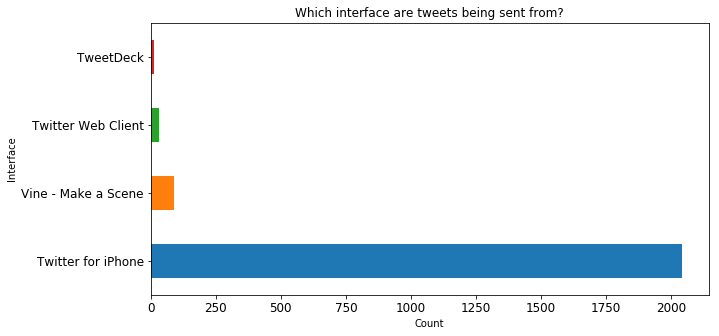

In [38]:
twitter_arch_clean['source'].value_counts().plot(kind='barh',  figsize=(10,5),fontsize=12)
plt.title('Which interface are tweets being sent from?')
plt.xlabel('Count')
plt.ylabel('Interface');

#### It is pretty clear that most of the tweets are sent through Twitter for iPhone. 

#### While TweetDeck and Twitter Web Client are desktop apps, Vine and Twitter for iPhone are mobile apps. 

#### This is a war about portability. You only need your phone to retweet or to  take photos and tweet about them, there is no need for a desktop.

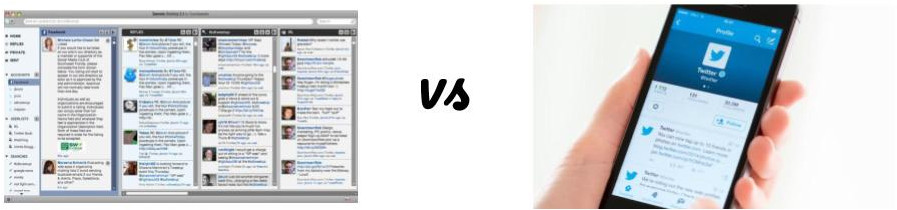

In [39]:
from IPython.display import Image
Image("vs.jpg")

### Which are the most tweeted dog breeds?

In [40]:
dogs_by_breed = twitter_arch_clean.query('is_it_a_dog==True').groupby('prediction', as_index=False)['is_it_a_dog'].count()
#dogs_by_breed

In [41]:
top_10_dogs_by_breed = dogs_by_breed.nlargest(10,'is_it_a_dog')
#top_10_dogs_by_breed

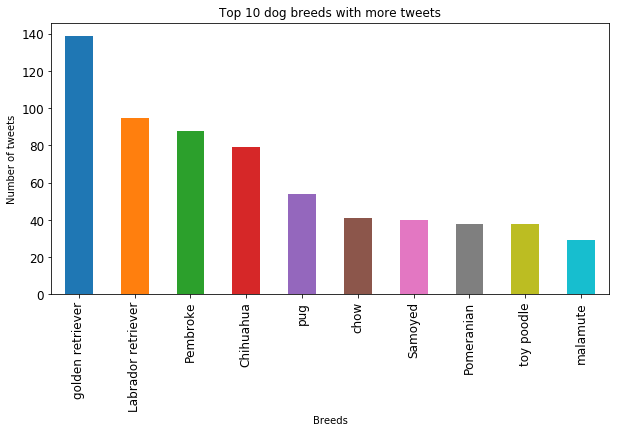

In [42]:
top_10_dogs_by_breed.plot(x='prediction', y='is_it_a_dog' , kind='bar', legend=None, figsize=(10,5),fontsize=12)
plt.title('Top 10 dog breeds with more tweets')
plt.xlabel('Breeds')
plt.ylabel('Number of tweets');

#### The breed which stands out in tweets sent is... tatatataaaan..  golden retriever!!!    With almost 140 tweets. It could happen to be the most popular breed, or there could be more dogs of this breed than others. 

#### Labrador retriever, pembroke, and chihuahua breeds follow, they show between 80 and 100 tweets each.

#### Then the pugs have around 50 tweets in the same time. ...arf!!!

#### These are the breeds that people tweet about

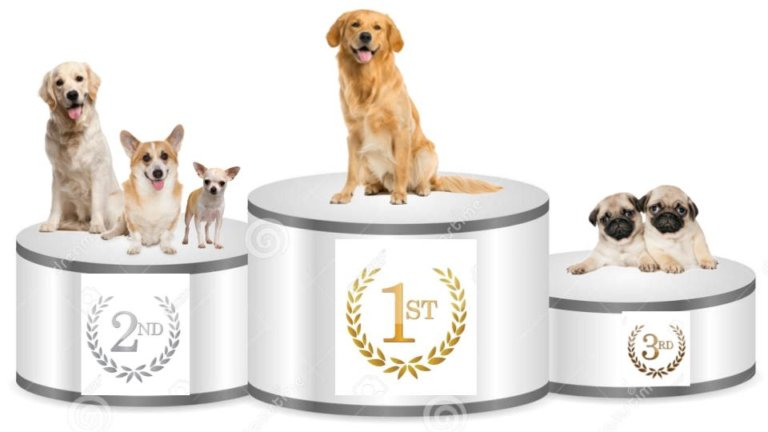

In [43]:
from IPython.display import Image
Image("dogs_podium.jpg")

#### In the other hand, is there any preference by WeRateDogs in their ratings?

### Which are the top rated breeds by WeRateDogs?

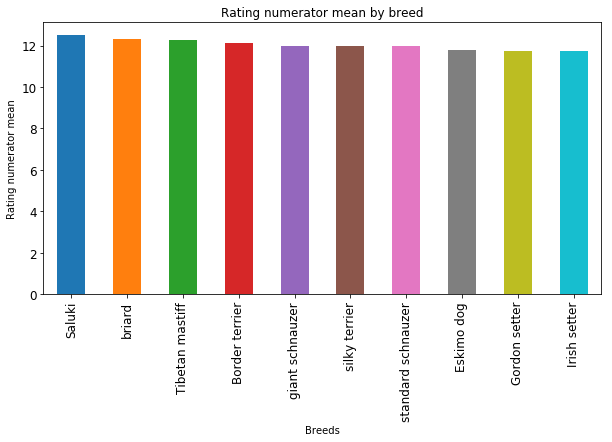

In [34]:
top_10_numerator_by_breed = rating_mean_by_breed.nlargest(10,'rating_numerator')
top_10_numerator_by_breed
top_10_numerator_by_breed.plot(x='prediction', y='rating_numerator' , kind='bar', legend=None, figsize=(10,5),fontsize=12)
plt.title('Rating numerator mean by breed')
plt.xlabel('Breeds')
plt.ylabel('Rating numerator mean');

#### We notice the top rated breeds are different from the top tweeted breeds.

####  The three best rated breeds in WeRateDogs are pomeranian, saluki and briard dogs, but there is not much variation in rating means, at least not between the top 10 dog breeds.

### How do ratings vary by breed?

In [44]:
# Get the tweet images predicted as DOGS, with a denominator of 10
dogs_denominator_10 = twitter_arch_clean.query('rating_denominator== 10 & is_it_a_dog==True & prediction!="clumber"')
rating_mean_by_breed = dogs_denominator_10.groupby(['prediction'], as_index=False)['rating_numerator'].mean()


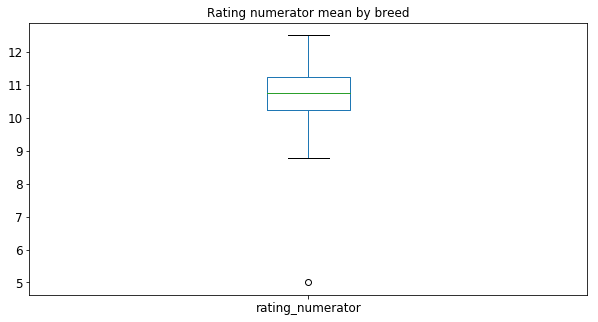

In [45]:
rating_mean_by_breed.plot(x='prediction', y='rating_numerator' , kind='box', legend=None, figsize=(10,5),fontsize=12)
plt.title('Rating numerator mean by breed');


In [48]:
rating_mean_by_breed.describe()

,rating_numerator
count,110.000000
mean,10.641668
std,0.980846
min,5.000000
25%,10.243056
50%,10.763889
75%,11.237500
max,12.500000


#### When calculating the rating mean by breed, almost all ratings stay around 9 and 12 and a half. There is only one out of range with a rating mean of 5. 

#### For me, WeRateDogs seem to have no noticeable preference for some particular breeds.

#### In this calculation, only the rating numerators with denominators of exactly 10 were used. This means that photos with more than one dog were not taken into account, because in one photo dogs of different breeds may be shown.


This report was elaborated by Liliana Hirugame for the Udacity Data Analyst Udacity Nanodegree, as part of the Wrangle and Analyze Project.

December 2018
